In [105]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

import scipy.stats as stats

In [115]:
colnames = ["Tijdstempel","programme","mlcourse","ircourse","statcourse","dbcourse","gender","chatGPT","birthday","studentestimate",
            "stand","stress","sporthours","random","bedtime","goodday1","goodday2"]
dataset = pd.read_csv("./dataset/ODI-2024.csv", skiprows=3, names=colnames)
dataset.drop("Tijdstempel", axis=1, inplace=True)
dataset["mlcourse"] = dataset["mlcourse"].astype("category")
dataset["ircourse"] = dataset["ircourse"].astype("category")
dataset["statcourse"] = dataset["statcourse"].astype("category")
dataset["gender"] = dataset["gender"].astype("category")
dataset["chatGPT"] = dataset["chatGPT"].astype("category")
dataset["stand"] = dataset["stand"].astype("category")
dataset.head()


,programme,mlcourse,ircourse,statcourse,dbcourse,gender,chatGPT,birthday,studentestimate,stand,stress,sporthours,random,bedtime,goodday1,goodday2
0,CLS,no,0,mu,nee,female,yes,3.25,300,no,10000000.0,10,360,1:00,TV shows,friends
1,Genes in Behavior and Health,no,0,mu,nee,female,yes,06/10/1994,300,no,35.0,4,47,1:00,Sports,Friends
2,AI,yes,1,mu,ja,female,not willing to say,05.04.1996,200,no,76.0,0,35,0:00,If the to do list is empty,If I have a new book
3,Business Analytics,yes,unknown,mu,nee,female,not willing to say,28/10/1997,134,no,30.0,3,5,2:00 AM,Food,Shopping
4,Master Econometrics and Data Science,yes,0,mu,ja,female,no,04/06/2002,200,no,20.0,8,3,23:30,Good food,Good company


In [116]:
def generalizeProgramme(x):
    if "bioinformatics" in x or "bisb" in x:
        return "bioinformatics and systems biology"
    if "econometrics" in x:
        return "econometrics and data science"
    if "fintech" in x:
        return "finiancial technology"
    if "computational science" in x:
        return "computational science"
    if "human language technology" in x:
        return "human language technology"
    if "business analytics" in x:
        return "business analytics"
    if "computational finance" in x:
        return "computational finance"
    if "big data" in x:
        if "engineering" in x:
            return "big data engineering"
        else:
            return "big data"
    if "political data journalism" in x:
        return "political data journalism"
    if "quantitative risk management" in x:
        return "quantitative risk management"
    if "software engineering" in x:
        return "software engineering"
    if "cls" in x:
        return "critical language scholarship"
    if " ai " in x or "artificial intelligence" in x:
        if "health" in x:
            return "ai for health"
        else:
            return "artificial intelligence"
    if " cs " in x or "computer science" in x:
        return "computer science"
    if "ba" in x:
        return "bachelor of arts"
    if "mpa" in x:
        return "public administration"
    

dataset["programme"] = dataset["programme"].map(lambda x: x.lower())
dataset["programme"] = dataset["programme"].map(lambda x: f" {x} ")
dataset["programme"] = dataset["programme"].map(generalizeProgramme)
dataset["programme"] = dataset["programme"].astype("category")

In [117]:
print(f"Amount unique programmes: {dataset["programme"].nunique()}")

print(dataset["mlcourse"].value_counts())
print(dataset["ircourse"].value_counts())
print(dataset["statcourse"].value_counts())


Amount unique programmes: 18
mlcourse
yes        198
no          46
unknown      1
Name: count, dtype: int64
ircourse
0          150
1           79
unknown     16
Name: count, dtype: int64
statcourse
mu         185
sigma       30
unknown     30
Name: count, dtype: int64


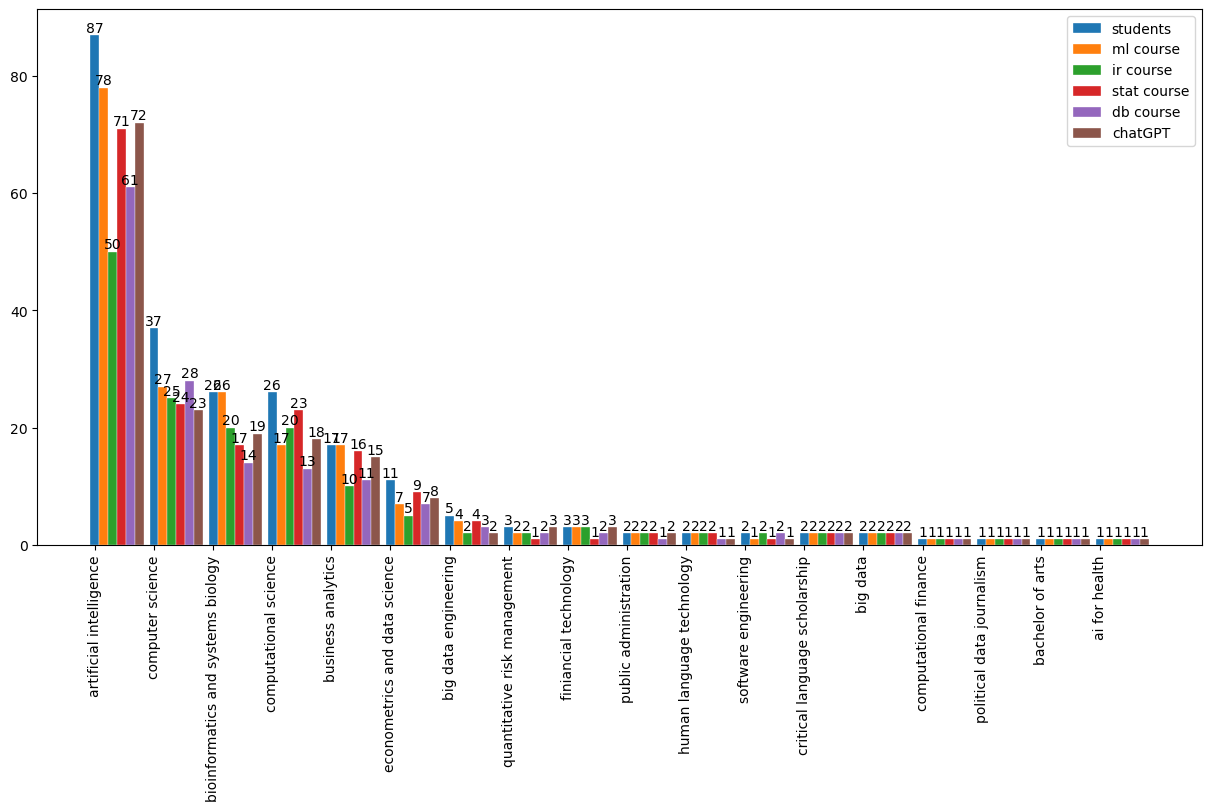

In [165]:
progfreq = dataset["programme"].value_counts()

progGrouped = dataset.groupby("programme", observed=True)
colfreqdic = {}
cols = ["mlcourse","ircourse","statcourse","dbcourse","chatGPT"]
for name in cols:
    colfreqdic[name] = []
    catfreq = progGrouped[name].value_counts()
    for prog in progfreq.index:
        colfreqdic[name].append(catfreq[prog].iloc[0])


x = np.arange(len(progfreq.index))

fig, ax = plt.subplots(figsize=(12,8), layout="constrained")
ax.set_xticks(x)

rect = ax.bar(x, progfreq.values, label="students", edgecolor="white", linewidth=0.25, width=0.15)
ax.bar_label(rect)
rect = ax.bar(x+0.15, colfreqdic["mlcourse"], label="ml course", edgecolor="white", linewidth=0.25, width=0.15)
ax.bar_label(rect)
rect = ax.bar(x+0.3, colfreqdic["ircourse"], label="ir course", edgecolor="white", linewidth=0.25, width=0.15)
ax.bar_label(rect)
rect = ax.bar(x+0.45, colfreqdic["statcourse"], label="stat course", edgecolor="white", linewidth=0.25, width=0.15)
ax.bar_label(rect)
rect = ax.bar(x+0.6, colfreqdic["dbcourse"], label="db course", edgecolor="white", linewidth=0.25, width=0.15)
ax.bar_label(rect)
rect = ax.bar(x+0.75, colfreqdic["chatGPT"], label="chatGPT", edgecolor="white", linewidth=0.25, width=0.15)
ax.bar_label(rect)

ax.set_xticklabels(progfreq.index)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.legend()
plt.show()
